In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

import warnings
warnings.filterwarnings('ignore')

In [7]:
insurance = pd.read_csv('insurance.csv')

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### EXPLORATORY DATA ANALYSIS

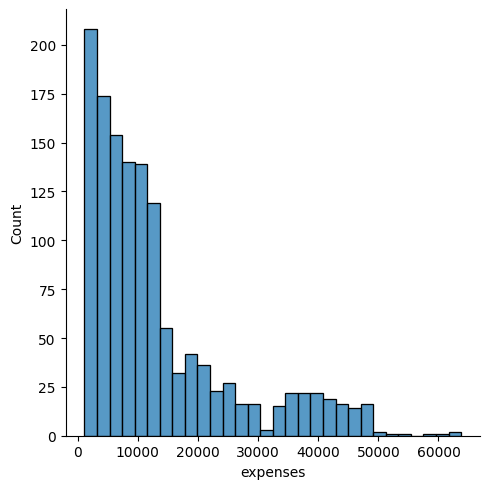

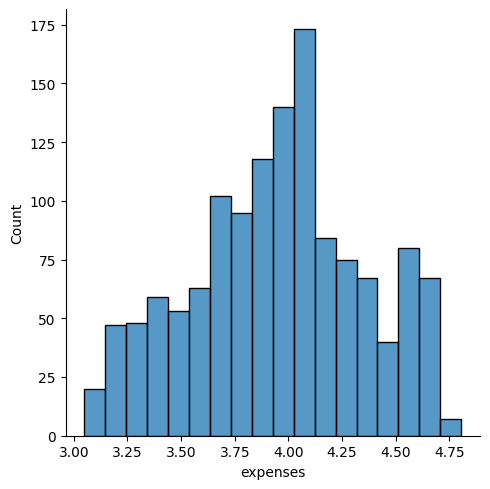

In [12]:
#we can apply log tranform to correst skewness
skewed = sns.displot(insurance['expenses']) #charges is right-skewed
skewed

log_trans = sns.displot(np.log10(insurance['expenses'])) #skewness is corrected using log
log_trans

In [13]:
expenses = insurance['expenses'].groupby(insurance['region']).sum().sort_values(ascending=False)
expenses

region
southeast    5363689.80
northeast    4343668.64
northwest    4035711.93
southwest    4012754.82
Name: expenses, dtype: float64

In [14]:
#to display grid in plot
sns.set(style="whitegrid")

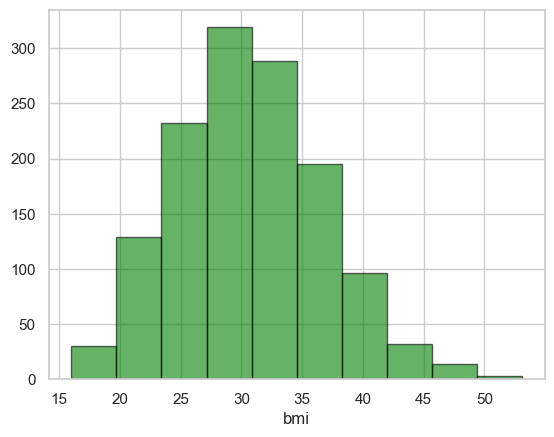

<Axes: xlabel='bmi', ylabel='Density'>

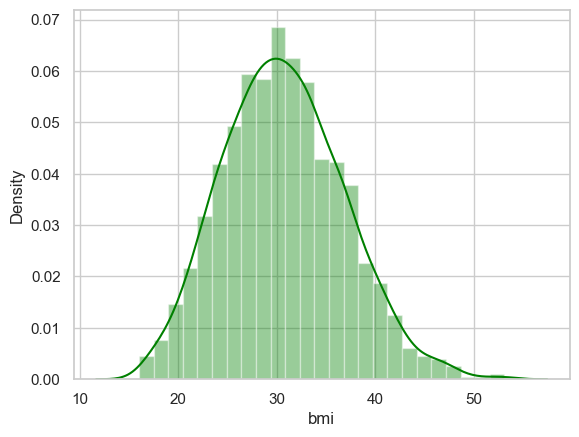

In [15]:
#ploting histogram and dist plot to see distribution of 'bmi' column
plt.hist(insurance['bmi'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('bmi')
plt.show()

sns.distplot(insurance['bmi'], color= 'green')

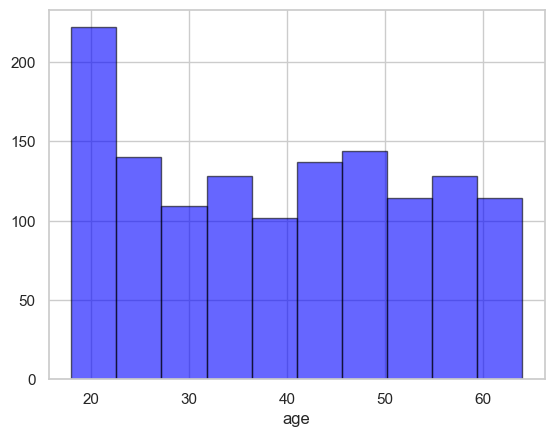

<Axes: xlabel='age', ylabel='Density'>

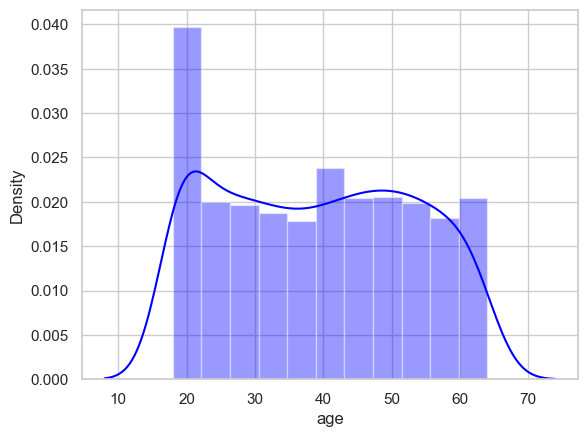

In [16]:
#ploting histogram and dist plot to see distribution of 'age' column
plt.hist(insurance['age'], color= 'blue', edgecolor = 'black', alpha = 0.6)
plt.xlabel('age')
plt.show()

sns.distplot(insurance['age'], color= 'blue')

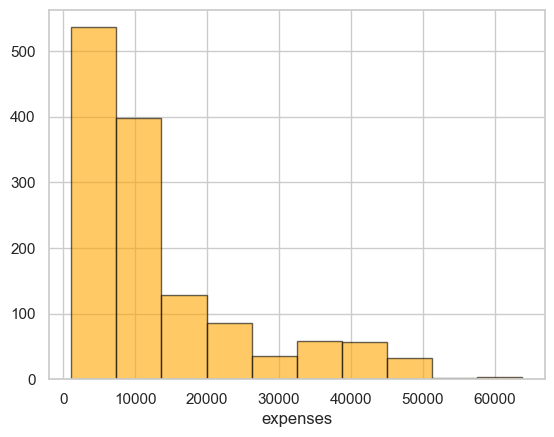

<Axes: xlabel='expenses', ylabel='Density'>

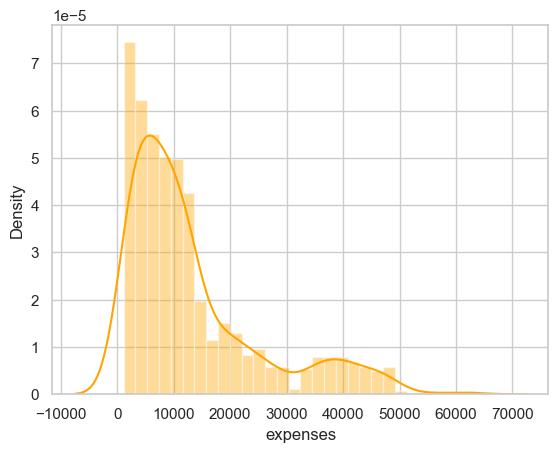

In [18]:
#ploting histogram and dist plot to see distribution of 'expenses' column
plt.hist(insurance['expenses'], color= 'orange', edgecolor = 'black', alpha = 0.6)
plt.xlabel('expenses')
plt.show()

sns.distplot(insurance['expenses'], color= 'orange')

<Axes: xlabel='region', ylabel='expenses'>

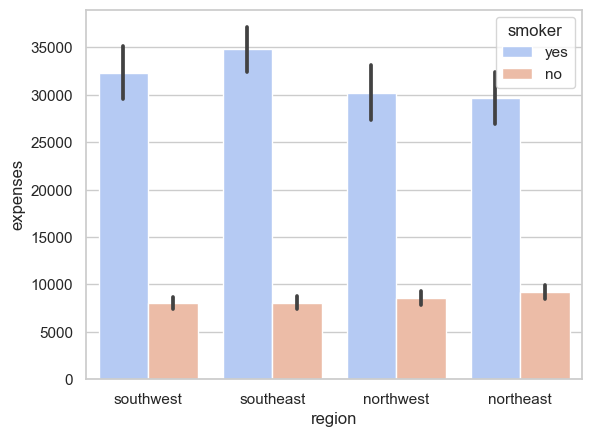

In [20]:
#WE CHECK THE EXPENSES BY REGION WHO ARE SMOKERS
sns.barplot(x='region', y='expenses', data=insurance, hue='smoker', palette='coolwarm')

<Axes: xlabel='region', ylabel='expenses'>

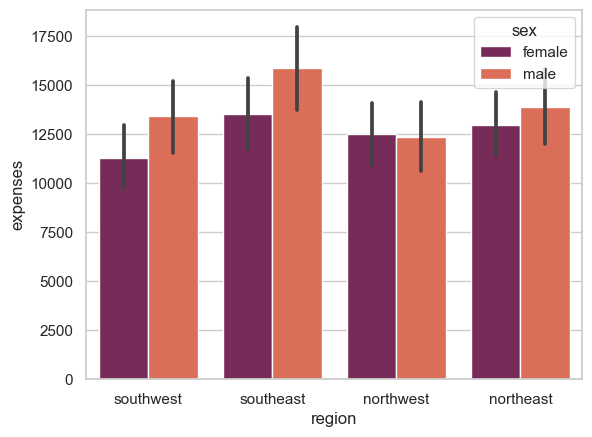

In [21]:
#WE CHECK THE EXPENSES BY REGION BY THIER SEX
sns.barplot(x='region', y='expenses', data=insurance, hue='sex', palette='rocket')

<Axes: xlabel='region', ylabel='expenses'>

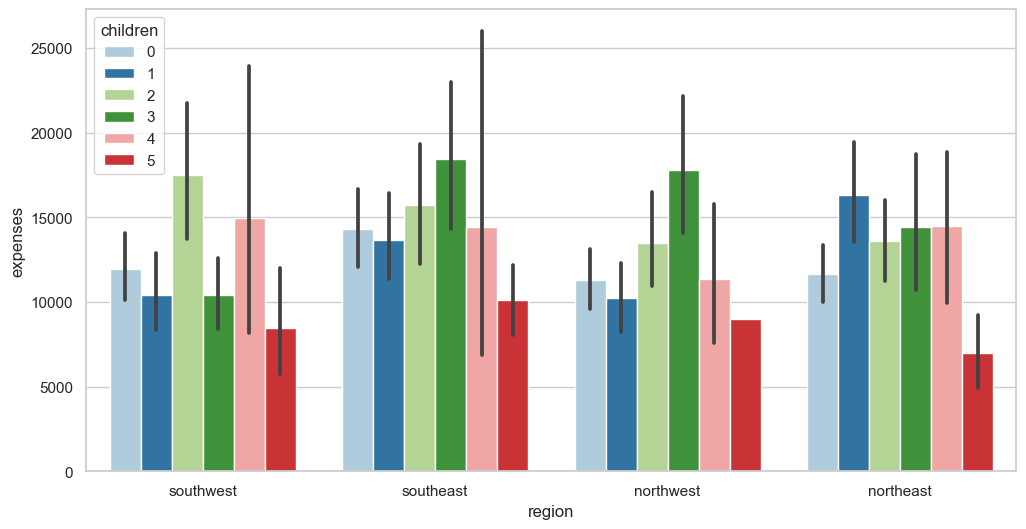

In [22]:
#WE CHECK THE EXPENSES BY REGION BY THE CHILDREN AVAILABLE
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='expenses', data=insurance, hue='children', palette='Paired')

<Axes: xlabel='children', ylabel='expenses'>

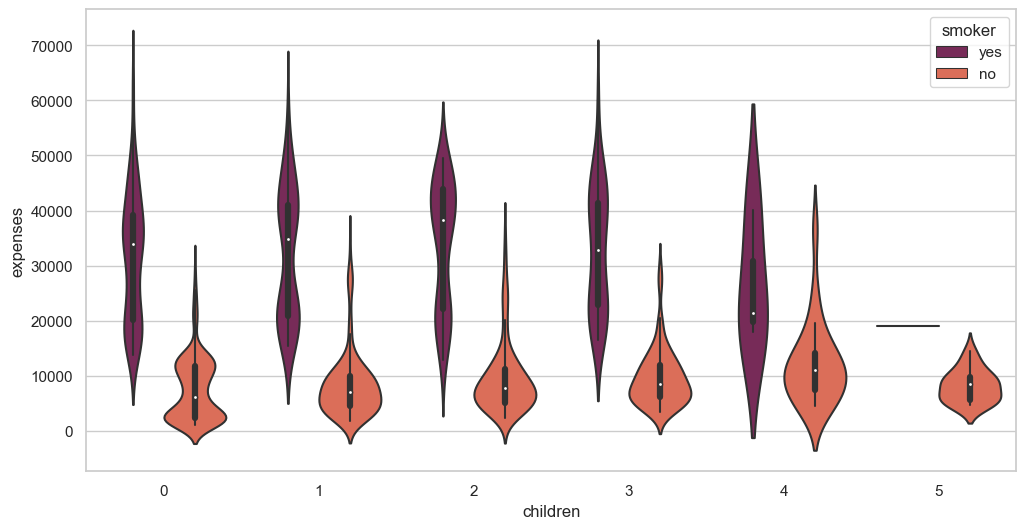

In [25]:
plt.figure(figsize=(12,6))
sns.violinplot(x='children', y='expenses', data=insurance, hue='smoker',split=False, palette='rocket')

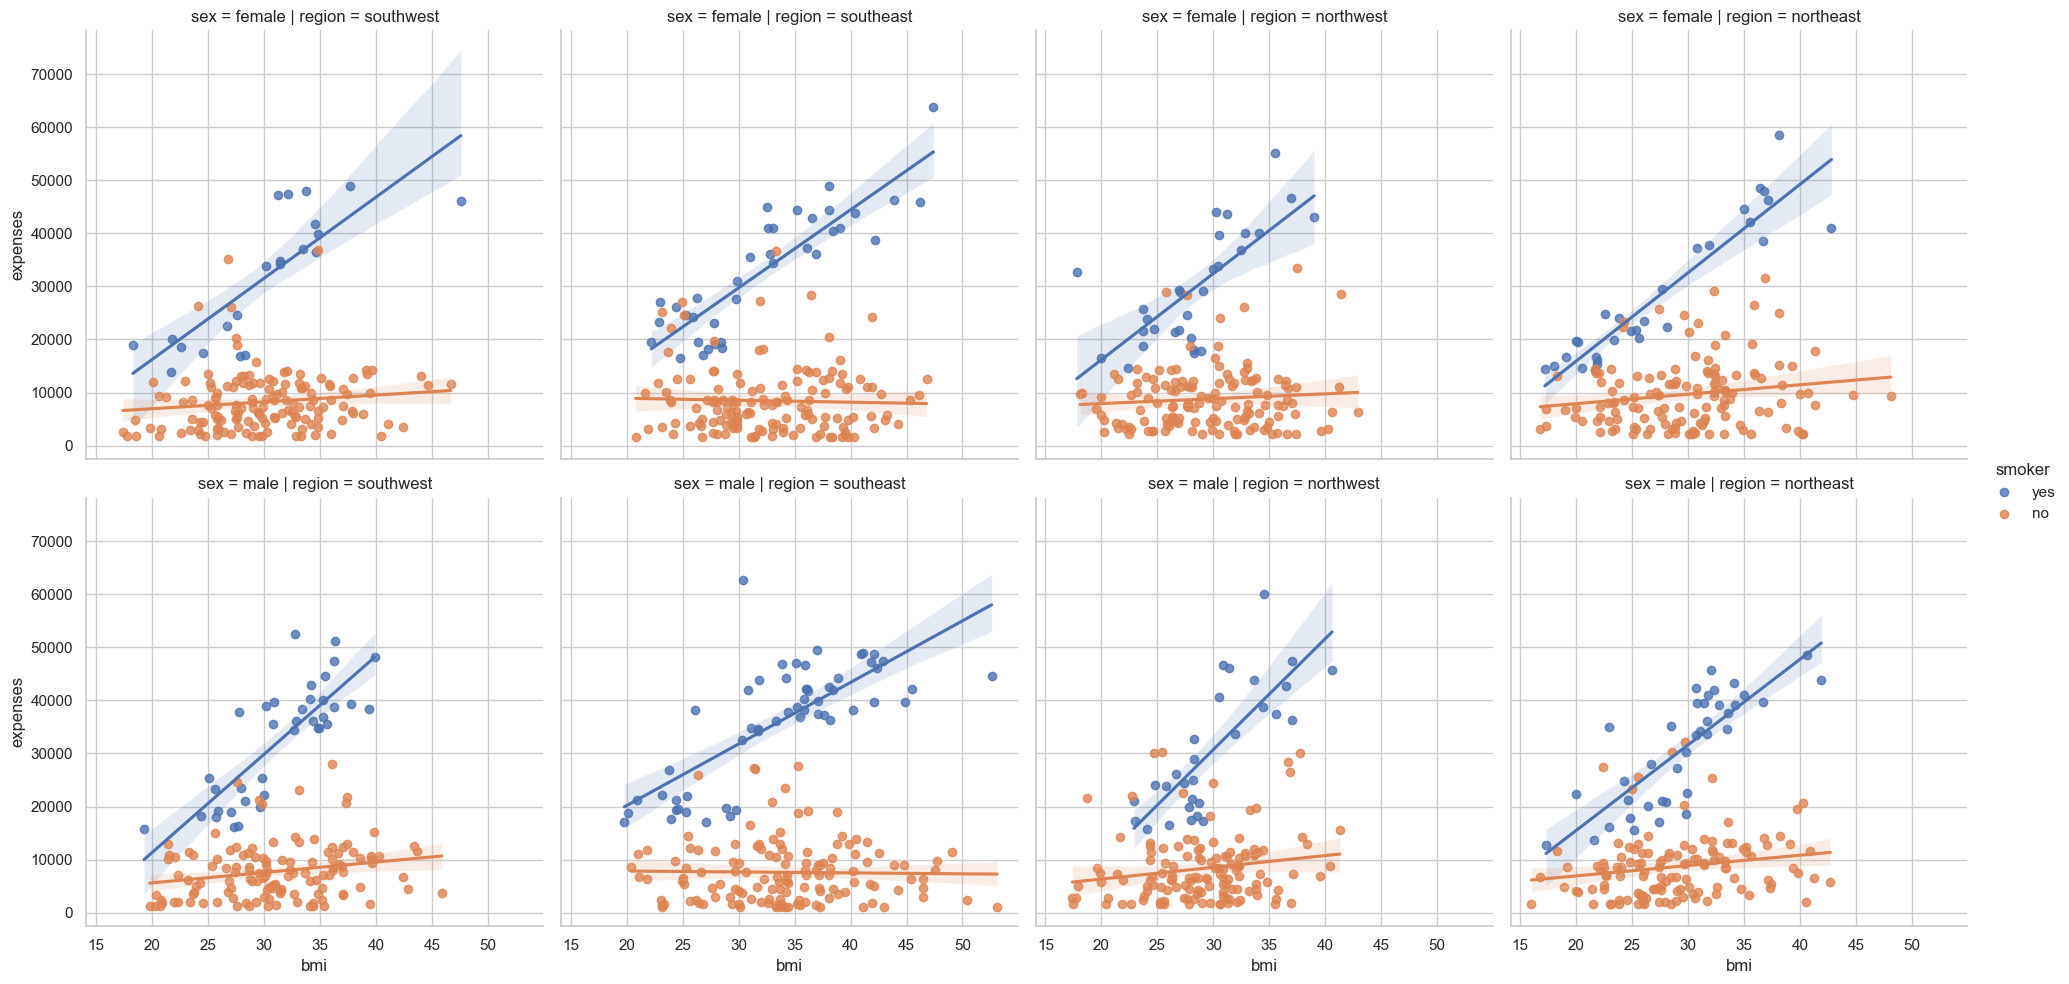

In [26]:
#regression plot to understand the relationship between the bmi and expenses considering
sns.lmplot(x="bmi", y="expenses", row="sex", col="region", hue='smoker', data=insurance)

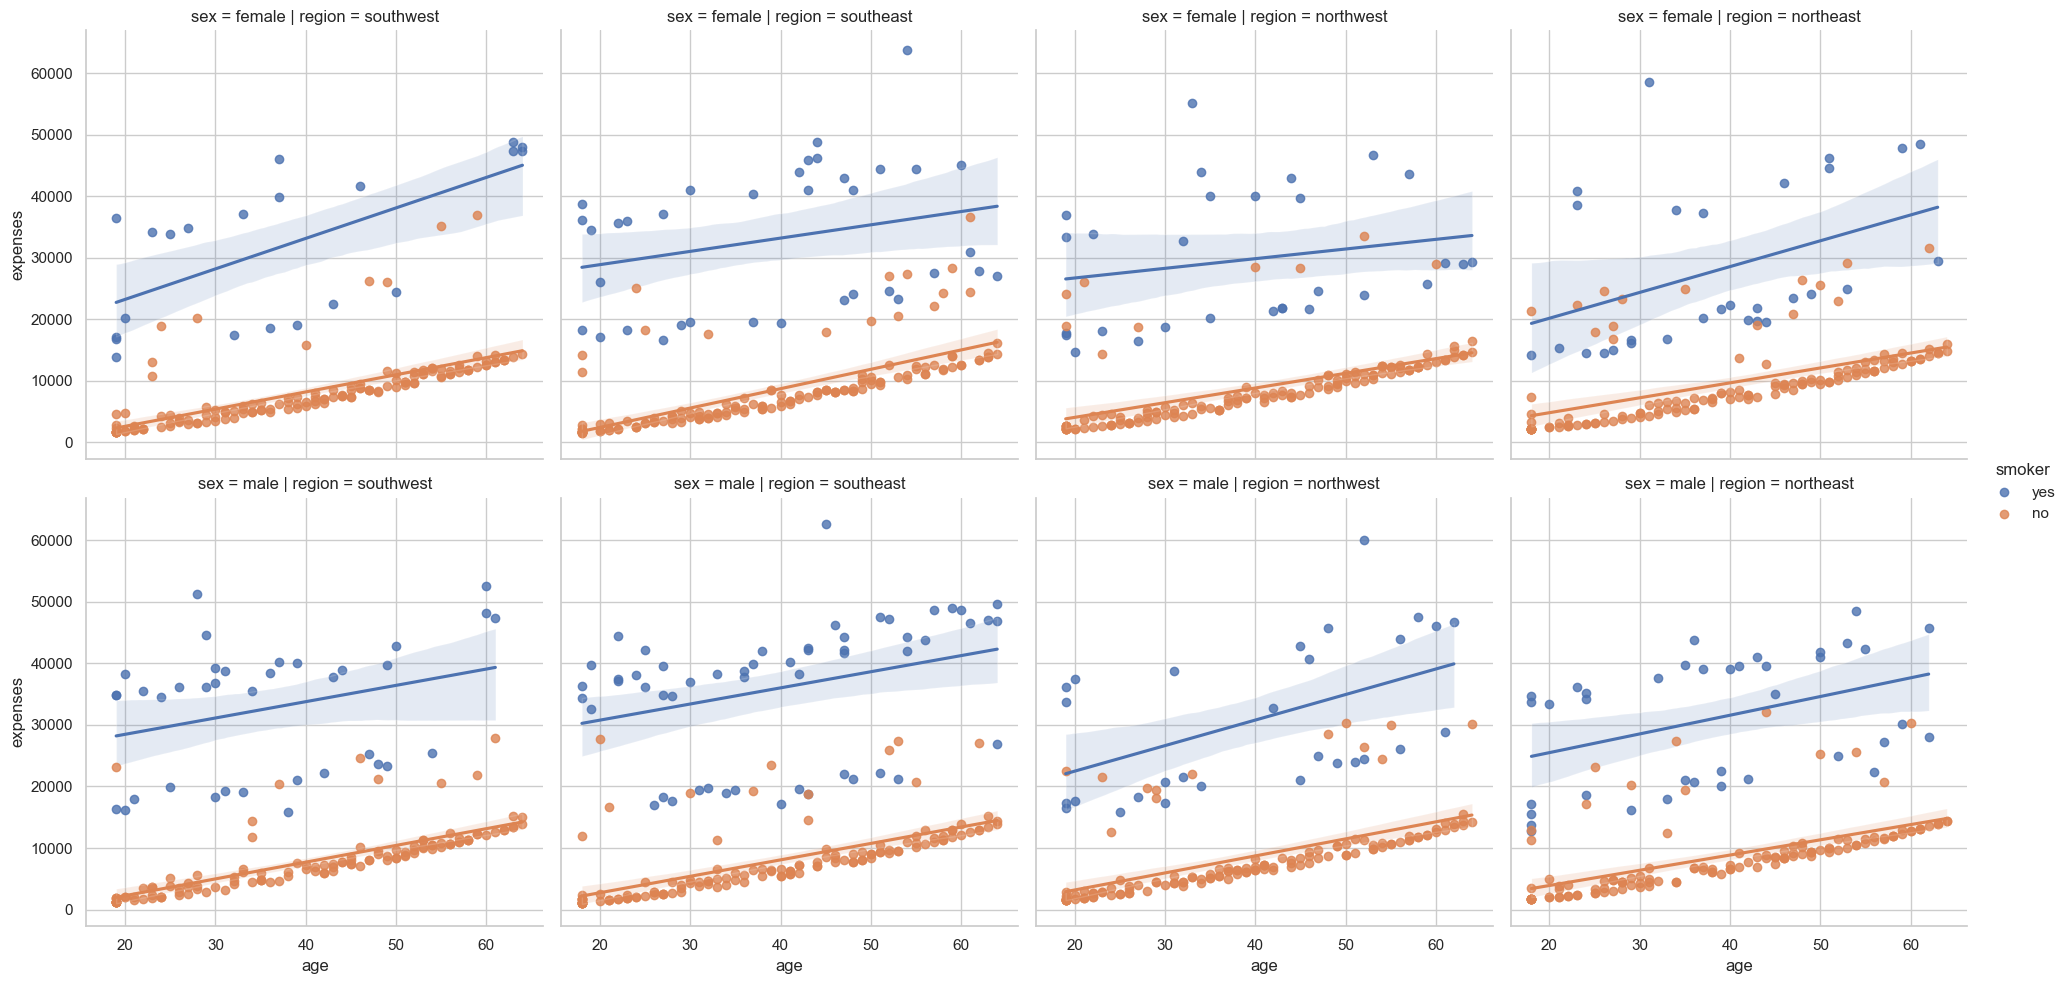

In [27]:
#regression plot to understand the relationship between the age and expenses considering
sns.lmplot(x="age", y="expenses", row="sex", col="region", hue='smoker', data=insurance)

In [28]:
#WE CONVERT OBJECT LABELS INTO CATEGORICAL DATA TYPE
insurance[['sex','region','smoker']] = insurance[['sex','region','smoker']].astype('category')
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
expenses     float64
dtype: object

In [29]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(insurance.sex.drop_duplicates())
insurance.sex = label.transform(insurance.sex)
label.fit(insurance.smoker.drop_duplicates())
insurance.smoker = label.transform(insurance.smoker)
label.fit(insurance.region.drop_duplicates())
insurance.region = label.transform(insurance.region)

In [30]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


<Axes: >

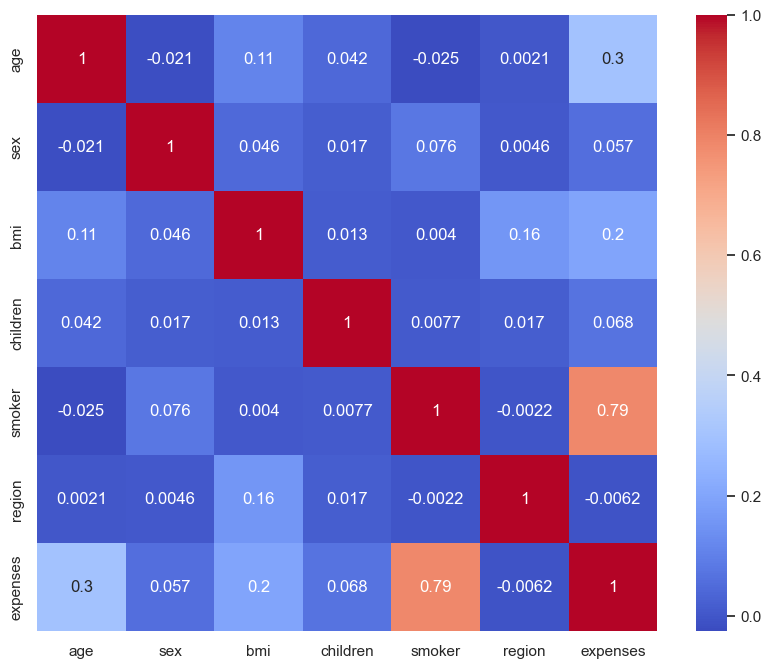

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(insurance.corr(),cmap='coolwarm',annot=True)

### WE SPLIT THE DATA INTO PREDICTOR AND RESPONSE VARIABLE

In [32]:
#we split our model
X = insurance.drop(['expenses'], axis = 1)
y = insurance['expenses']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## MODEL BUILDING

In [36]:
import statsmodels.api as sm #WE GET THE STATISTICAL MODEL
#add constant to predictor variables
X2 = sm.add_constant(X_train)
#fit linear regression model
model = sm.OLS(y_train, X2).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     524.7
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.35e-313
Time:                        18:12:05   Log-Likelihood:                -10839.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1063   BIC:                         2.173e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.121e+04   1070.073    -10.479      0.000   -1.33e+04   -9113.271
age          257.9936     13.425     19.217      0.000     231.650     284.337
sex         -244.2064    373.700     -0.653      0.514    -977.480     489.067
bmi          315.1668     31.068     10.144      0.000     254.204     376.129
children     412.2970    154.272      2.673      0.008     109.585     715.009
smoker      2.377e+04    461.915     51.452      0.000    2.29e+04    2.47e+04
region      -330.4157    169.688     -1.947      0.052    -663.378       2.546
==============================================================================
Omnibus:                      240.257   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              560.296
Skew:                           1.212   Prob(JB):                    2.15e-122
Kurtosis:                       5.586   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
R-squared: 0.747. This is known as the coefficient of determination. It is the proportion of the variance in the
response variable that can be explained by the predictor variables. In this example, 74.7% of the variation in
the exam scores can be explained by the number of hours studied and the number of prep exams taken.

F-statistic: 523.6. This is the overall F-statistic for the regression model.

Prob (F-statistic): 3.16e-313. This is the p-value associated with the overall F-statistic. It tells us whether or
not the regression model as a whole is statistically significant. In other words, it tells us if the predictor
variables combined have a statistically significant association with the response variable. In this case the pvalue
is less than 0.05, which indicates that the predictor variables combined have a statistically significant
association with the response variable.

coef: The coefficients for each predictor variable tell us the average expected change in the response
variable, assuming the other predictor variable remains constant.
model.summary()

P>|t|. The individual p-values tell us whether or not each predictor variable is statistically significant. it
statistically significant at α < 0.05 and not statistically significant at α => 0.05. Since “sex” is not statistically
significant, we may end up deciding to remove it from the model.

## MULTIPLE LINEAR REGRESSION MODEL

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
print('Intercept', lr.intercept_)
print('Coefficient', lr.coef_)
print('Score', lr.score(X_test, y_test))

Intercept -11212.966371646735
Coefficient [  257.99363174  -244.20642927   315.16678823   412.29695332
 23766.30765218  -330.41570117]
Score 0.762331239232596


In [42]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,257.993632
sex,-244.206429
bmi,315.166788
children,412.296953
smoker,23766.307652
region,-330.415701


In [44]:
#WE PREDICT OUR MODEL
y_pred1 = lr.predict(X_test)

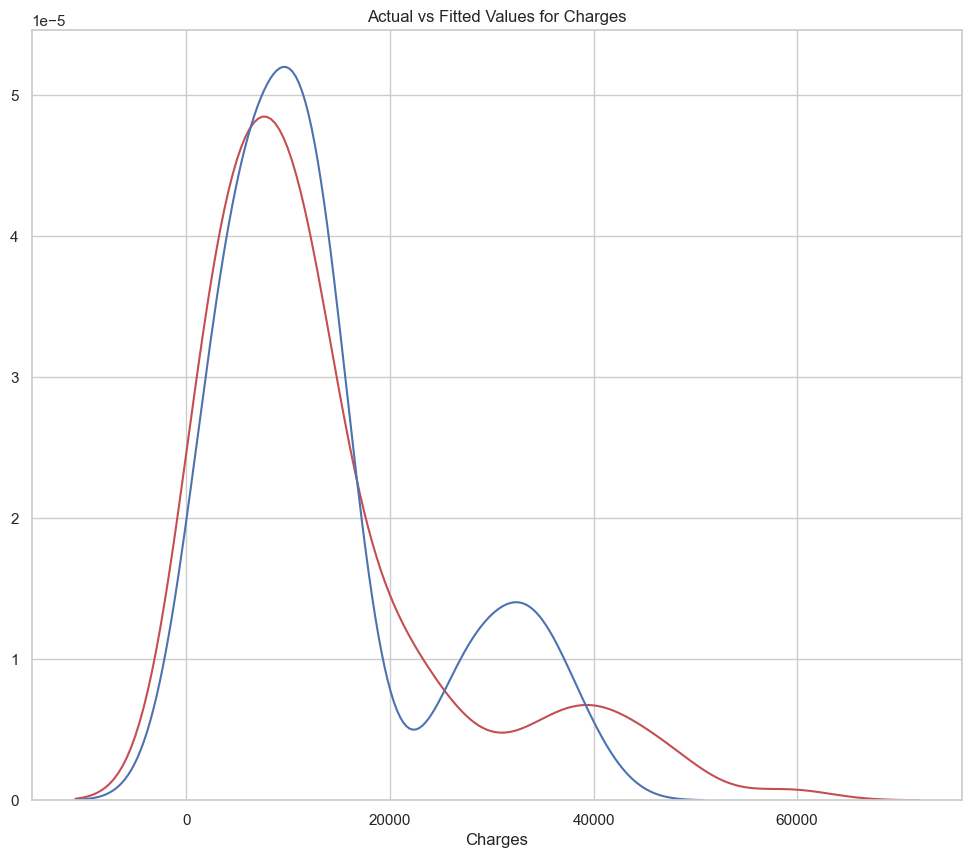

In [45]:
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

ANOTHER PLOTTING TECHNIQUE

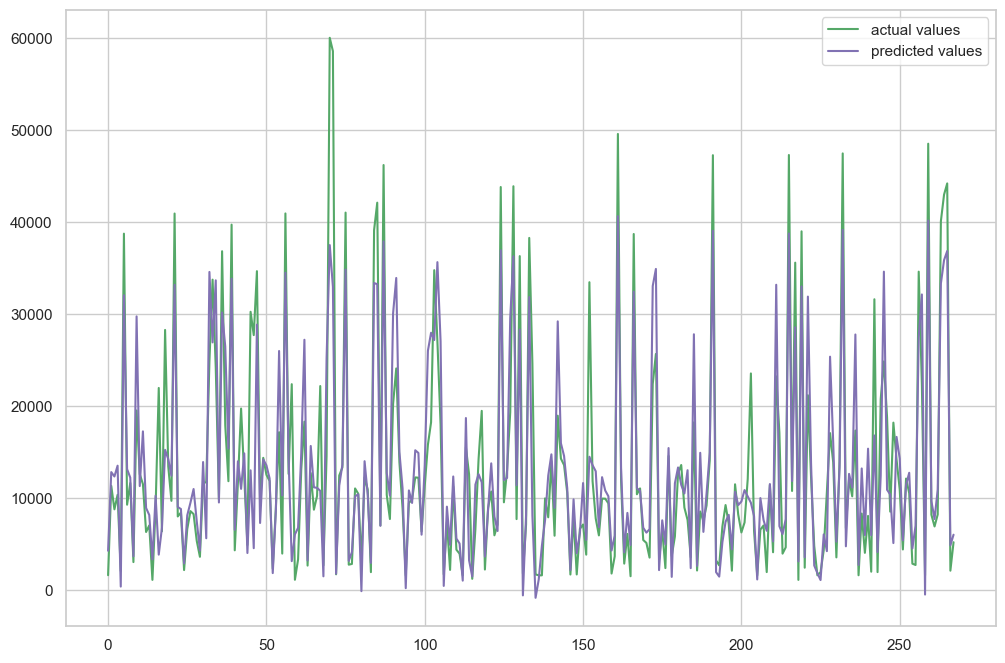

In [46]:
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],y_pred1, c='m',label="predicted values")
plt.legend()

In [47]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predicted1.head()

,Actual,Predicted
559,1646.43,4302.711483
1087,11353.23,12845.802336
1020,8798.59,12370.426479
460,10381.48,13539.885491
802,2103.08,409.962693


### LASSO REGRESSION MODEL

In [48]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [49]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=101) #we’ll use the RepeatedKFold
#define model
lasso_model = LassoCV(alphas=(0.1, 1.0, 10.0), cv=cv, n_jobs=-1)
#fit model
lasso_model.fit(X_train, y_train)

LassoCV(alphas=(0.1, 1.0, 10.0),
        cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=101),
        n_jobs=-1)

In [50]:
print(lasso_model.intercept_)
print(lasso_model.coef_)
print(lasso_model.score(X_test, y_test))

-11204.247667631817
[  257.9512974   -199.36274888   314.4749781    404.39085405
 23700.54111264  -321.50910483]
0.7622836136296156


In [51]:
#WE PREDICT OUR LASSOCV REGRESSION MODEL
y_pred2 = lasso_model.predict(X_test)

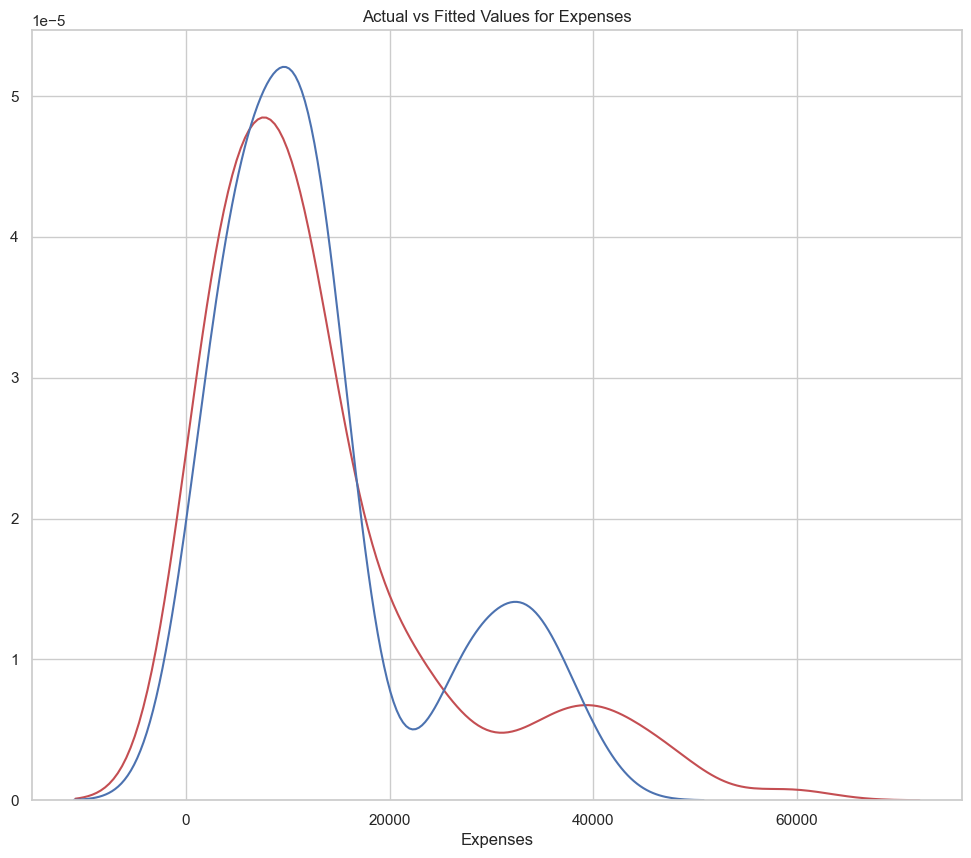

In [53]:
# Visualising the Lasso Regression results
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Expenses')
plt.xlabel('Expenses')
plt.ylabel('')
plt.show()
plt.close()

In [54]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predicted2.head()

,Actual,Predicted
559,1646.43,4339.816852
1087,11353.23,12884.066241
1020,8798.59,12422.952626
460,10381.48,13515.304456
802,2103.08,466.022380


## RIDGE REGRESSION MODEL

In [55]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [57]:
#define cross-validation method to evaluate model
rid = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101)

In [63]:
#define model
rid_model = RidgeCV(alphas=(0.1, 1.0, 10.0), cv=cv, scoring='neg_mean_absolute_error')
#fit model
rid_model.fit(X_train, y_train)

RidgeCV(cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=101),
        scoring='neg_mean_absolute_error')

In [65]:
print(rid_model.intercept_)
print(rid_model.coef_)
print(rid_model.score(X_test, y_test))

-11210.07529054926
[  257.98700467  -243.28914667   315.16070613   412.17470667
 23752.62168035  -330.39287304]
0.762321921026576


In [66]:
#WE PREDICT OUR RIDGECV REGRESSION MODEL
y_pred3 = rid_model.predict(X_test)

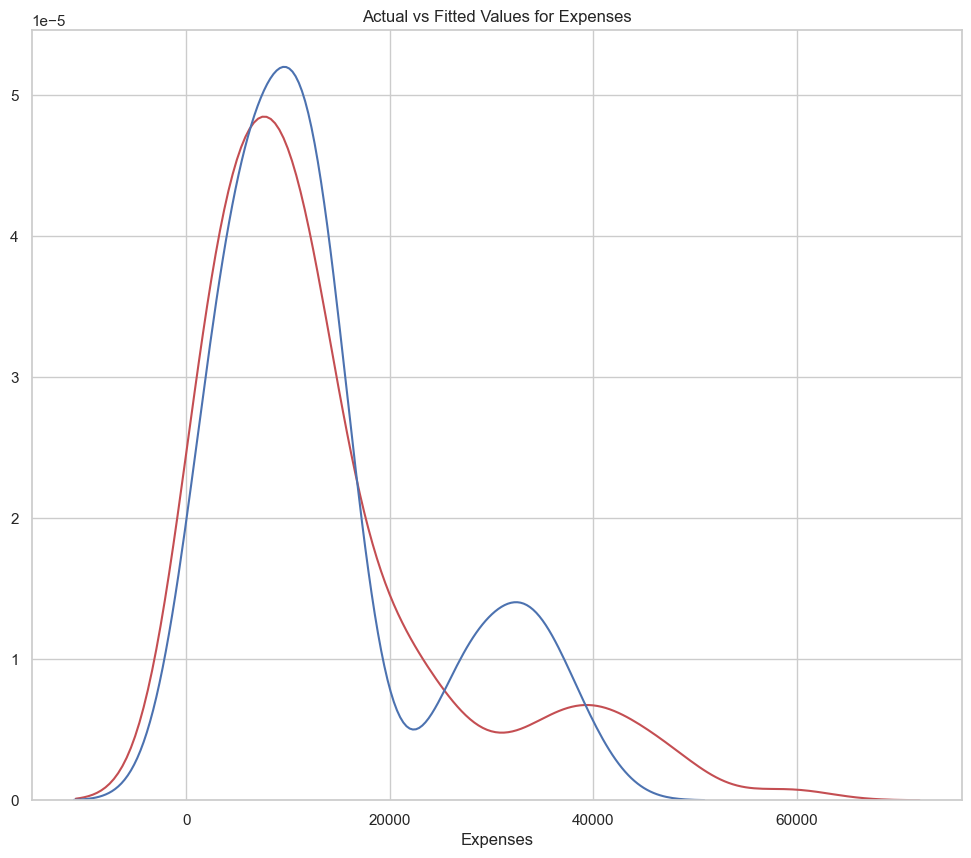

In [67]:
# Visualising the Ridge Regression results
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Expenses')
plt.xlabel('Expenses')
plt.ylabel('')
plt.show()
plt.close()

In [68]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
predicted3.head()

,Actual,Predicted
559,1646.43,4306.200846
1087,11353.23,12849.064199
1020,8798.59,12373.740309
460,10381.48,13541.908157
802,2103.08,413.442495


### ELASTICNET REGRESSOR

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

In [70]:
#define cross-validation method to evaluate model
rid = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [72]:
# define model
net_model = ElasticNet(alpha=0.1, l1_ratio=0.9, fit_intercept=True, max_iter=1000, random_state=1)
# evaluate model
scores = cross_val_score(net_model, X_train, y_train, scoring='neg_mean_absolute_error')
net_model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=1)

In [73]:
print(net_model.intercept_)
print(net_model.coef_)
print(net_model.score(X_test, y_test))

-10920.000510129756
[  257.32435457  -154.3128706    314.54778241   399.85063375
 22385.85354997  -327.90527799]
0.759352750063292


In [74]:
y_pred4 = net_model.predict(X_test)

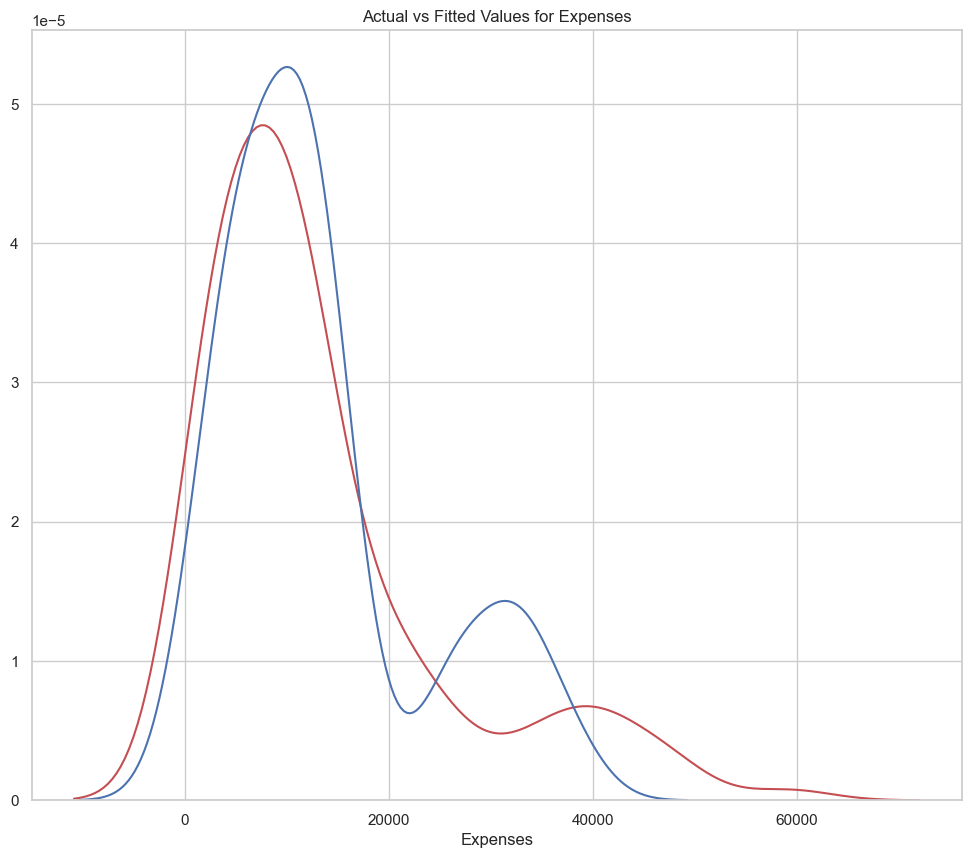

In [75]:
# Visualising the ElasticNet Regressor results
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred4, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Expenses')
plt.xlabel('Expenses')
plt.ylabel('')
plt.show()
plt.close()

In [76]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
predicted4.head()

,Actual,Predicted
559,1646.43,4653.390354
1087,11353.23,13173.524698
1020,8798.59,12703.780817
460,10381.48,13745.083045
802,2103.08,760.048413


### RANDOM FOREST REGRESSOR

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
rfg = RandomForestRegressor(n_estimators=100, n_jobs=-1, min_samples_split=2, random_state=123)

#fit the regressor model
rfg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=123)

In [130]:
print(rfg.score(X_test, y_test))

0.858211901679369


In [131]:
y_pred5 = rfg.predict(X_test)

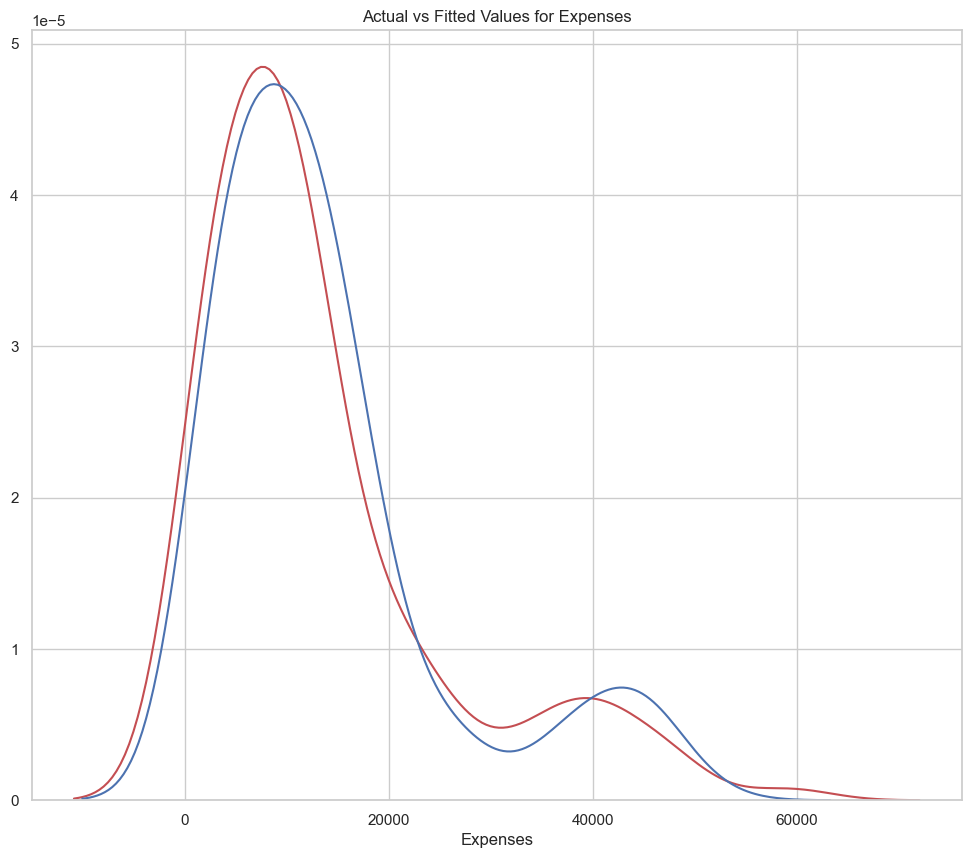

In [132]:
# Visualising the Random Forest Regressor results
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred5, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Expenses')
plt.xlabel('Expenses')
plt.ylabel('')
plt.show()
plt.close()

In [133]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5})
predicted5.head()

,Actual,Predicted
559,1646.43,1658.7792
1087,11353.23,13848.8963
1020,8798.59,9253.2242
460,10381.48,10459.4274
802,2103.08,2201.3517


### WE TRY SELECT THE BEST FEATURES USING FEATURE IMPORTANCE FROM RANDOM FOREST REGRESSOR

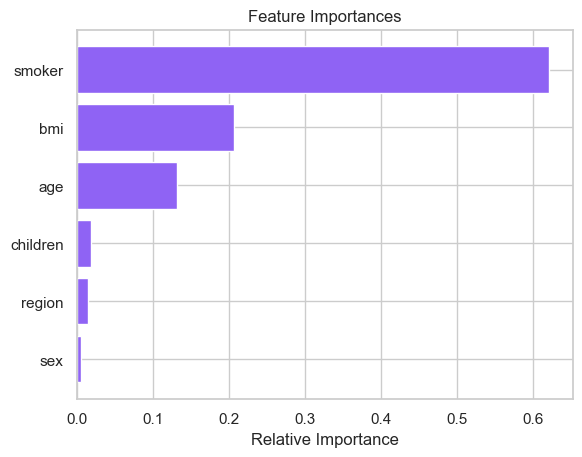

In [134]:
features = X.columns
importances = rfg.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that the smoker, bmi and age are more important features compared to the other features.

In [135]:
#We select the import features
X = insurance.drop(['expenses', 'region', 'sex'], axis = 1)
y = insurance['expenses']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [136]:
X.shape

(1338, 4)

### WE BUILD A MODEL USING THE POLYNOMIAL REGRESSION AFTER FEATURE IMPORTANCE

### POLYNOMIAL REGRESSION MODEL

In [137]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly, y, test_size = 0.2, random_state=1)

In [138]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [139]:
print(pol_reg.intercept_)
print(pol_reg.coef_)
print(pol_reg.score(X_test, y_test))

-3385.4919822005413
[ 0.00000000e+00 -1.07954273e+02  4.62752248e+02  1.42540545e+03
 -9.30984295e+03  3.80374939e+00  2.18219888e+00  3.87946769e+00
 -1.88781919e+01 -8.48077191e+00 -1.58360360e+01  1.42346161e+03
 -1.17194741e+02 -4.78770050e+02 -9.30984295e+03]
0.8599208131563718


In [140]:
#WE PREDICT OUR POLYNOMIAL REGRESSION MODEL
y_pred6 = pol_reg.predict(X_test)

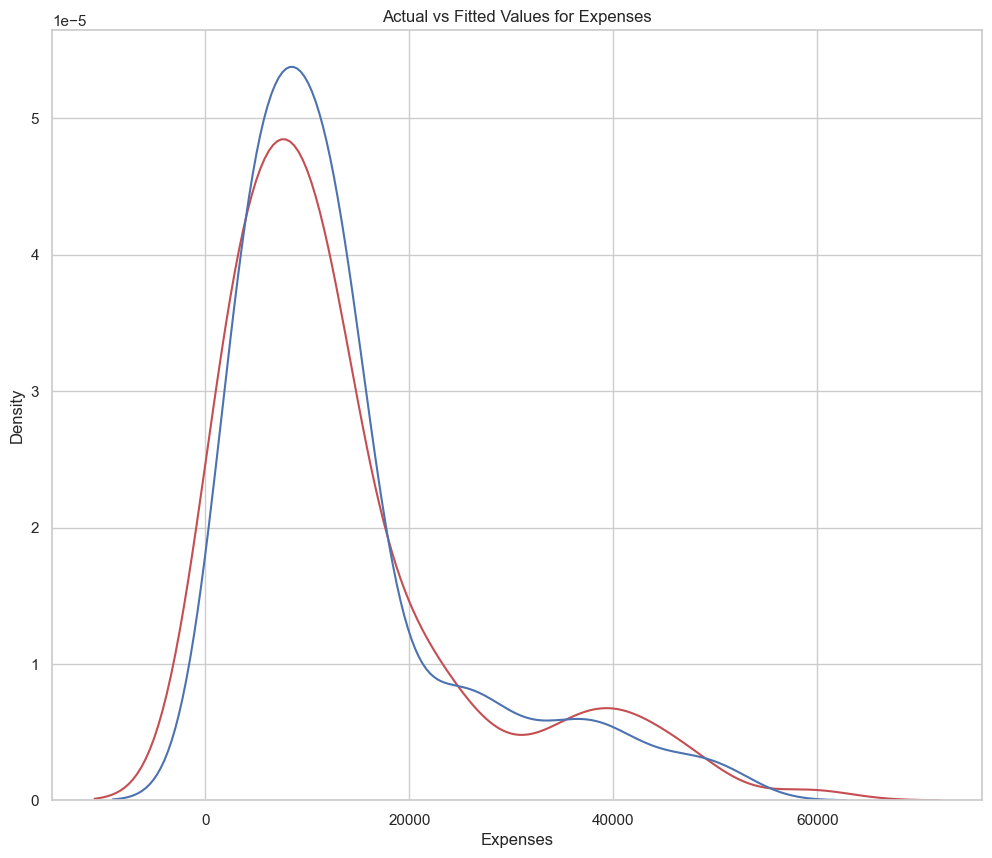

In [141]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred6, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Expenses')
plt.xlabel('Expenses')

plt.show()
plt.close()

In [142]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted6 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred6})
predicted6.head()

,Actual,Predicted
559,1646.43,3148.235515
1087,11353.23,12899.284195
1020,8798.59,10631.857975
460,10381.48,12000.284526
802,2103.08,4185.353494


### MODEL EVALUATION

In [144]:
from sklearn import metrics
from sklearn.metrics import r2_score

MULTIPLE LINEAR REGRESSION

In [145]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 4055.6116197274114
Mean Square Error: 35479346.438996
Root Mean Square Error: 5956.4541834044185


LASSOCV REGRESSION

In [146]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 4060.387460326809
Mean Square Error: 35486456.0198347
Root Mean Square Error: 5957.0509499109285


RIDGECV REGRESSION

In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 4056.6962094871524
Mean Square Error: 35480737.46682191
Root Mean Square Error: 5956.570948693712


ELASTICNET REGRESSION

In [148]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

Mean Absolute Error: 4168.660779494903
Mean Square Error: 35923977.23002351
Root Mean Square Error: 5993.661421036686


RANDOM FOREST REGRESSOR

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred5))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 2558.9379369402973
Mean Square Error: 21166219.089968137
Root Mean Square Error: 4600.675938377766


POLYNOMIAL REGRESSION

In [151]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred6))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

Mean Absolute Error: 2737.8053869300206
Mean Square Error: 20911111.678584367
Root Mean Square Error: 4572.86689928587


From the model evaluation score, we can see that polynomial regression and the Random Forest Regressor are performing well than the other models.
We can conclude that smoking have an high impact on the cost of medical insurance follwed by bmi and age. 
Sex is not really a determining factor